In [8]:
import numpy as np

# Adjacency list (using your corrected edges)
edges = {
    0: [1, 8],
    1: [7],
    2: [0],
    3: [4],
    4: [7, 5],
    5: [9, 6],
    6: [2, 8],
    7: [8, 5],
    8: [9],
    9: [7]
}

n = 10  # number of nodes
P = np.zeros((n, n))

# Construct Markov transition matrix (column-stochastic)
for j in range(n):
    if len(edges[j]) == 0:
        P[:, j] = 1.0 / n  # handle dangling node (no outgoing edges)
    else:
        for i in edges[j]:
            P[i, j] = 1.0 / len(edges[j])

print("Markov transition matrix P:\n", np.round(P, 3))
print("Column sums (should be 1):", np.round(P.sum(axis=0), 2))


Markov transition matrix P:
 [[0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.5 0.  0.  0.  0.  1. ]
 [0.5 0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.  1.  0. ]]
Column sums (should be 1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
v = np.ones(n) / n   # initial normalized vector (1-norm = 1)
max_iter = 100
tol = 1e-10

res_list, diff_list, rq_list = [], [], []

for k in range(max_iter):
    v_new = P @ v
    v_new /= np.linalg.norm(v_new, 1)   # normalize using 1-norm

    # Rayleigh quotient (for dominant eigenvalue approximation)
    rq = (v_new @ (P @ v_new)) / (v_new @ v_new)

    # Residual (still computed with 2-norm for accuracy checking)
    res = np.linalg.norm(P @ v_new - rq * v_new, 2)
    
    # Difference between successive vectors (can also use 1-norm if preferred)
    diff = np.linalg.norm(v_new - v, 1)

    rq_list.append(rq)
    res_list.append(res)
    diff_list.append(diff)

    if diff < tol:
        break
    v = v_new

pagerank = v_new
print("\nFinal PageRank vector:\n", np.round(pagerank, 4))
print("Dominant eigenvalue (Rayleigh quotient):", rq)
print("1-norm of PageRank vector =", np.linalg.norm(pagerank, 1))



Final PageRank vector:
 [0.0339 0.0169 0.0339 0.     0.     0.1356 0.0678 0.2712 0.1864 0.2542]
Dominant eigenvalue (Rayleigh quotient): 1.00000042976804
1-norm of PageRank vector = 1.0


In [10]:
most_ranked = np.argmax(pagerank)
least_ranked = np.argmin(pagerank)

print(f"\nHighest PageRank node: {most_ranked} with score {pagerank[most_ranked]:.4f}")
print(f"Lowest PageRank node: {least_ranked} with score {pagerank[least_ranked]:.4f}")



Highest PageRank node: 7 with score 0.2712
Lowest PageRank node: 3 with score 0.0000


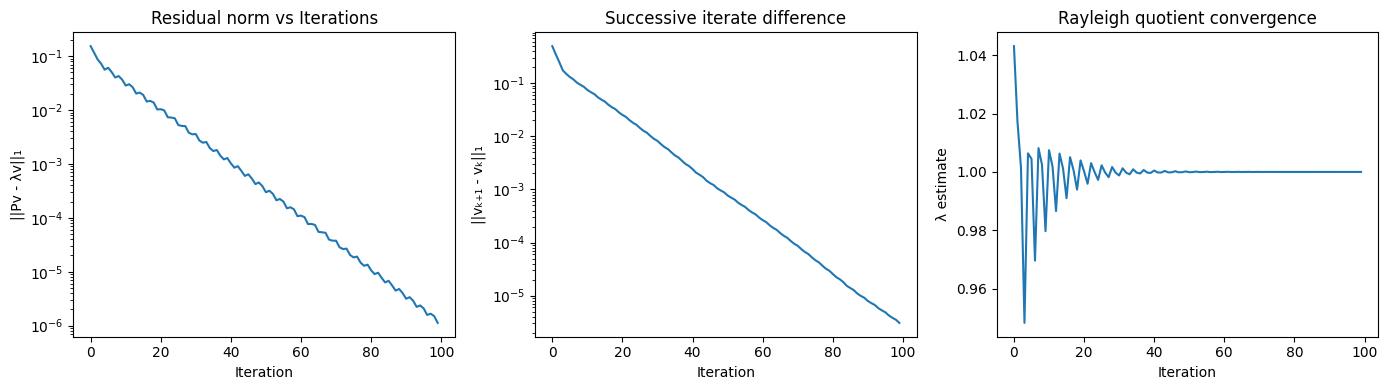

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.semilogy(res_list)
plt.title("Residual norm vs Iterations")
plt.xlabel("Iteration"); plt.ylabel("||Pv - λv||₁")

plt.subplot(1,3,2)
plt.semilogy(diff_list)
plt.title("Successive iterate difference")
plt.xlabel("Iteration"); plt.ylabel("||vₖ₊₁ - vₖ||₁")

plt.subplot(1,3,3)
plt.plot(rq_list)
plt.title("Rayleigh quotient convergence")
plt.xlabel("Iteration"); plt.ylabel("λ estimate")

plt.tight_layout()
plt.show()
